In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.preprocessing import MinMaxScaler

In [41]:
data = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
data.duplicated().sum()

np.int64(0)

In [44]:
mms = MinMaxScaler()
for col in data.columns:
  if col == "Outcome":
    continue
  else:
   data[col] = mms.fit_transform(data[[col]])

In [45]:
x = data.drop(["Outcome"], axis=1)
y = data[['Outcome']]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [50]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614, 1), (154, 8), (154, 1))

In [51]:
log = LogisticRegression()
model = log.fit(x_train, y_train)

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
y_pred = model.predict(x_test)

In [53]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.7662337662337663

In [60]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[86, 13],
       [23, 32]])

In [ ]:
import seaborn as sns

In [62]:
y_test.value_counts()

Outcome
0          99
1          55
Name: count, dtype: int64

<Axes: >

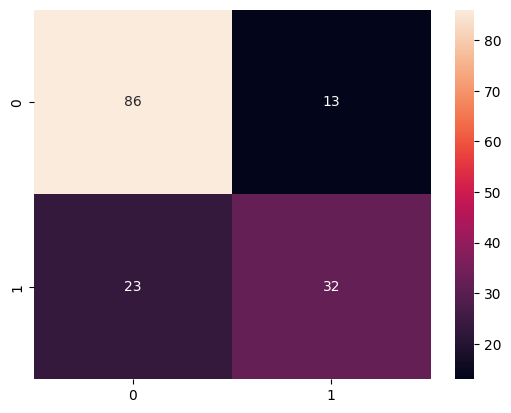

In [61]:
sns.heatmap(confusion, annot=True)

In [70]:
y_score = model.predict_proba(x_test)[:,1]
y_score

array([0.32701312, 0.2077487 , 0.1540085 , 0.25802459, 0.47194986,
       0.44910189, 0.05303478, 0.46424017, 0.49911789, 0.66656158,
       0.31804619, 0.79847188, 0.3798797 , 0.34450171, 0.13645347,
       0.36545758, 0.17451626, 0.1386927 , 0.66738588, 0.42904215,
       0.26956844, 0.13923675, 0.49355521, 0.14232229, 0.5053947 ,
       0.76071778, 0.18979604, 0.08896099, 0.24820829, 0.19166438,
       0.72190538, 0.74152501, 0.66419965, 0.60834978, 0.513052  ,
       0.62342007, 0.88877406, 0.28615219, 0.53564069, 0.4489424 ,
       0.13005592, 0.52675348, 0.51768068, 0.3657196 , 0.09260495,
       0.49863253, 0.60092711, 0.24063538, 0.43049545, 0.86647571,
       0.10458626, 0.65158087, 0.75952519, 0.26722219, 0.17476259,
       0.09252709, 0.67199918, 0.03067846, 0.3618415 , 0.61175006,
       0.64113463, 0.31208523, 0.38790566, 0.33707677, 0.12728453,
       0.47054136, 0.10035068, 0.57019118, 0.10008539, 0.64848277,
       0.63749913, 0.14004618, 0.2794021 , 0.15610109, 0.16188

In [71]:
tpr, fpr, threshold = roc_curve(y_test, y_score)

In [74]:
threshold

array([       inf, 0.88877406, 0.86647571, 0.81839158, 0.79847188,
       0.68240939, 0.67199918, 0.66738588, 0.66656158, 0.66419965,
       0.66109074, 0.64113463, 0.62419887, 0.5372944 , 0.49911789,
       0.49863253, 0.49355521, 0.49120738, 0.48163049, 0.47847496,
       0.44910189, 0.4489424 , 0.43049545, 0.41475832, 0.38790566,
       0.3798797 , 0.37634774, 0.36545758, 0.34450171, 0.33707677,
       0.32701312, 0.31804619, 0.30538176, 0.29982443, 0.29326591,
       0.28615219, 0.26956844, 0.26722219, 0.2508634 , 0.24820829,
       0.22725662, 0.21685834, 0.2077487 , 0.19840585, 0.18934101,
       0.18463159, 0.16188092, 0.15610109, 0.12016448, 0.11782897,
       0.02467722])

In [75]:
tpr

array([0.        , 0.        , 0.01010101, 0.01010101, 0.02020202,
       0.02020202, 0.03030303, 0.03030303, 0.04040404, 0.04040404,
       0.05050505, 0.05050505, 0.07070707, 0.07070707, 0.15151515,
       0.15151515, 0.16161616, 0.16161616, 0.17171717, 0.17171717,
       0.22222222, 0.22222222, 0.24242424, 0.24242424, 0.28282828,
       0.28282828, 0.29292929, 0.29292929, 0.34343434, 0.34343434,
       0.35353535, 0.35353535, 0.38383838, 0.38383838, 0.39393939,
       0.39393939, 0.43434343, 0.43434343, 0.50505051, 0.50505051,
       0.55555556, 0.55555556, 0.56565657, 0.56565657, 0.60606061,
       0.60606061, 0.67676768, 0.67676768, 0.83838384, 0.83838384,
       1.        ])

In [76]:
fpr

array([0.        , 0.01818182, 0.01818182, 0.03636364, 0.03636364,
       0.25454545, 0.25454545, 0.27272727, 0.27272727, 0.30909091,
       0.30909091, 0.4       , 0.4       , 0.58181818, 0.58181818,
       0.6       , 0.6       , 0.61818182, 0.61818182, 0.63636364,
       0.63636364, 0.65454545, 0.65454545, 0.69090909, 0.69090909,
       0.70909091, 0.70909091, 0.74545455, 0.74545455, 0.78181818,
       0.78181818, 0.81818182, 0.81818182, 0.83636364, 0.83636364,
       0.85454545, 0.85454545, 0.87272727, 0.87272727, 0.89090909,
       0.89090909, 0.92727273, 0.92727273, 0.94545455, 0.94545455,
       0.96363636, 0.96363636, 0.98181818, 0.98181818, 1.        ,
       1.        ])